# MODULE 1: Training a Building Detection Model

In this module, we will use [Microsoft Building Footprints](https://planetarycomputer.microsoft.com/dataset/ms-buildings#overview) dataset to train a YOLOv8n model. This model will serve as pretrained model, which will be fine-tuned for EY Challenge 2024 dataset in Module 2. 

The pipeline for Module 1 is shown below:
1. Get **Microsoft-Building** dataset (only Puerto Rico region) from Module 0
2. **Transfer Learning**: Use YOLOv8 (with COCO weights) on the Puerto Rico dataset

##  Dependencies

In [1]:
# Install YOLOv8
!pip install ultralytics==8.0.196

# Import required libraries
from IPython import display
display.clear_output()

## Custom Training

In [2]:
from ultralytics import YOLO

# yaml file of the training dataset
dataset = "msft-buildings"
yaml_file = f"{dataset}/data.yaml"

# use COCO pretrained YOLOv8 models for transfer learning
model = YOLO("yolov8n.pt")
model.train(data=yaml_file, epochs=80, imgsz=512, plots=True)

New https://pypi.org/project/ultralytics/8.1.17 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=msft-buildings/data.yaml, epochs=80, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, a

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4898561340>
fitness: 0.3794640517129215
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.34873])
names: {0: 'buildings'}
plot: True
results_dict: {'metrics/precision(B)': 0.7300005628785157, 'metrics/recall(B)': 0.611353279175748, 'metrics/mAP50(B)': 0.6560390101806547, 'metrics/mAP50-95(B)': 0.3487335007720623, 'fitness': 0.3794640517129215}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.1067242648817475, 'inference': 0.9380974890050224, 'loss': 0.000468463862449096, 'postprocess': 0.6763315171425679}

## Results and Visualization



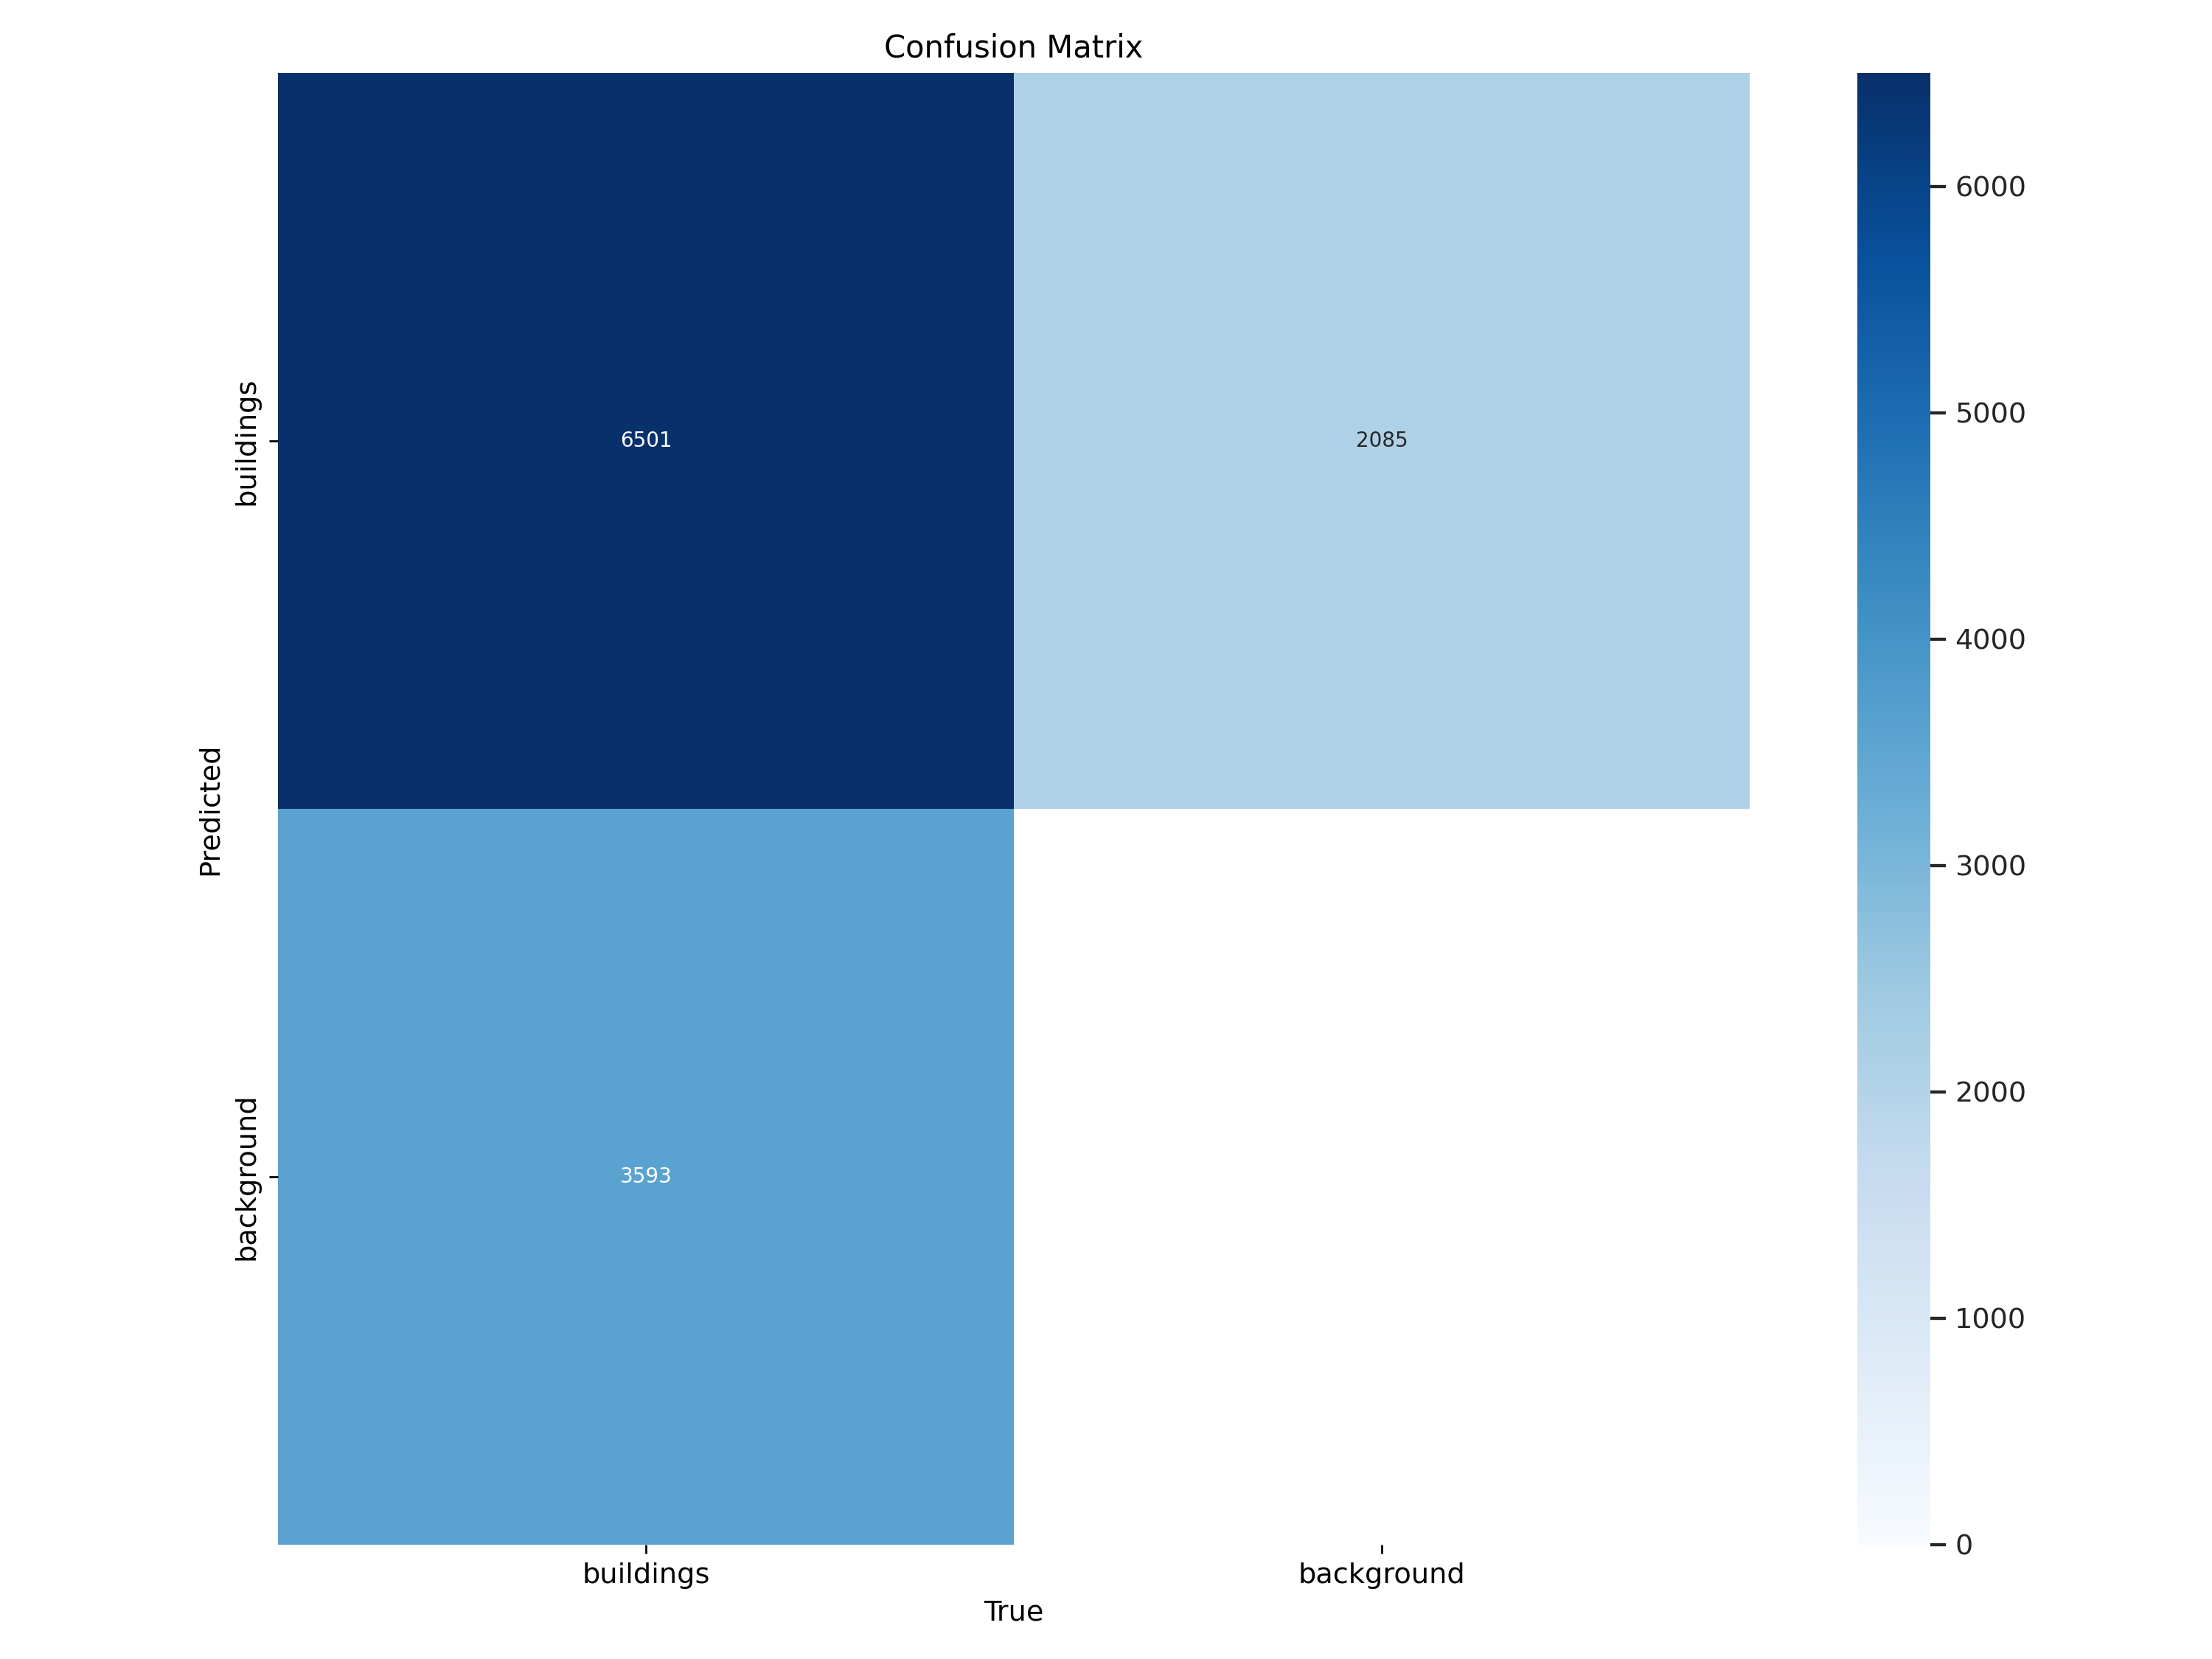

In [3]:
from IPython.display import Image

Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

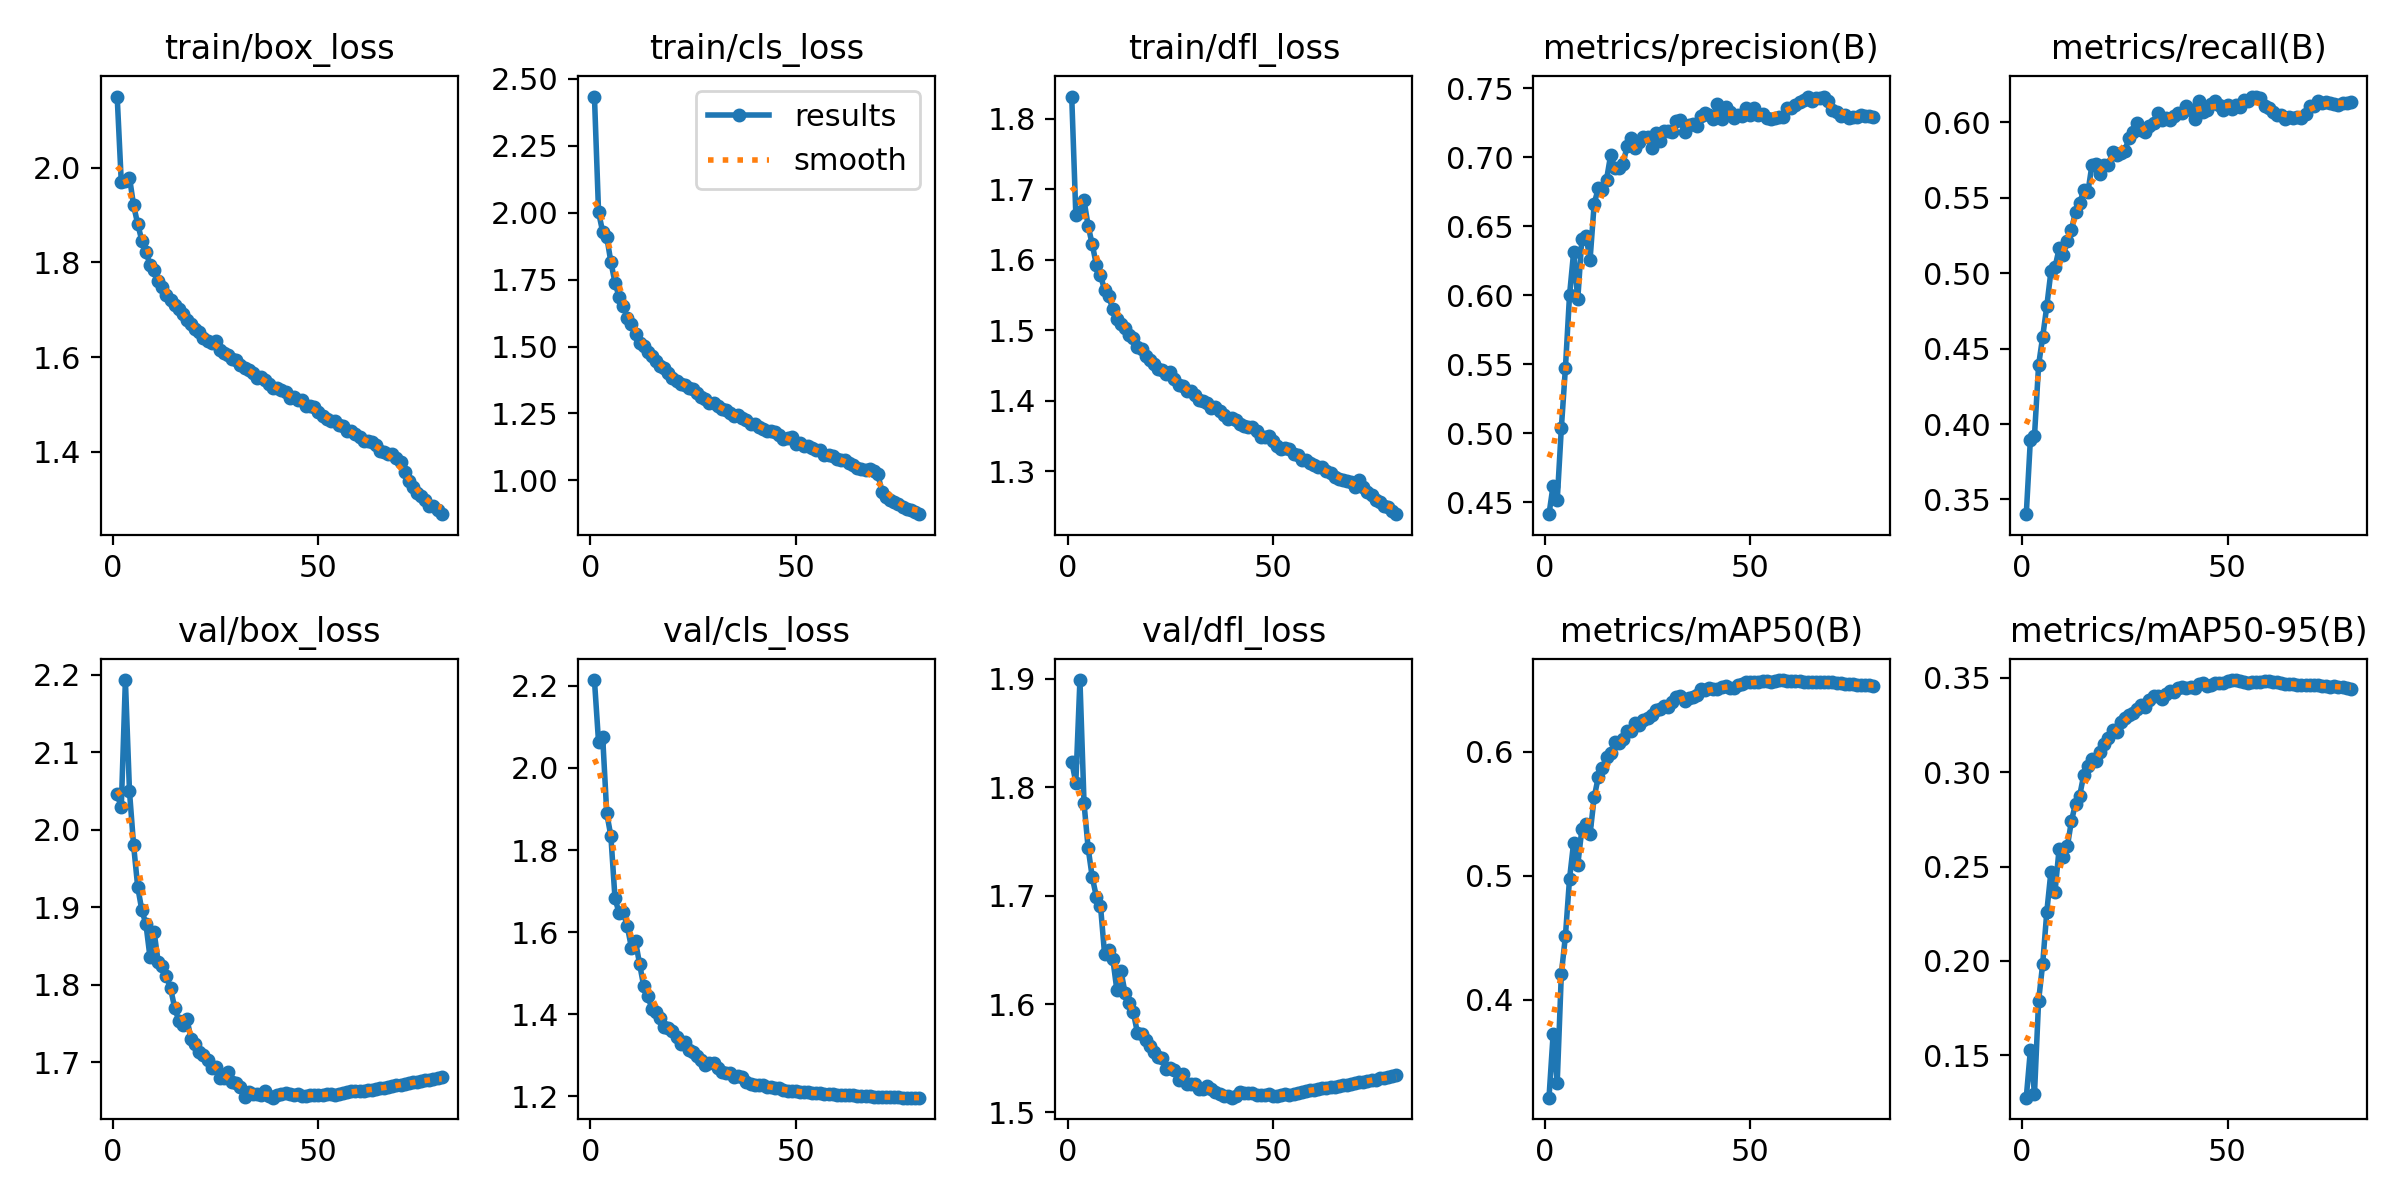

In [4]:
Image(filename=f'runs/detect/train/results.png', width=600)

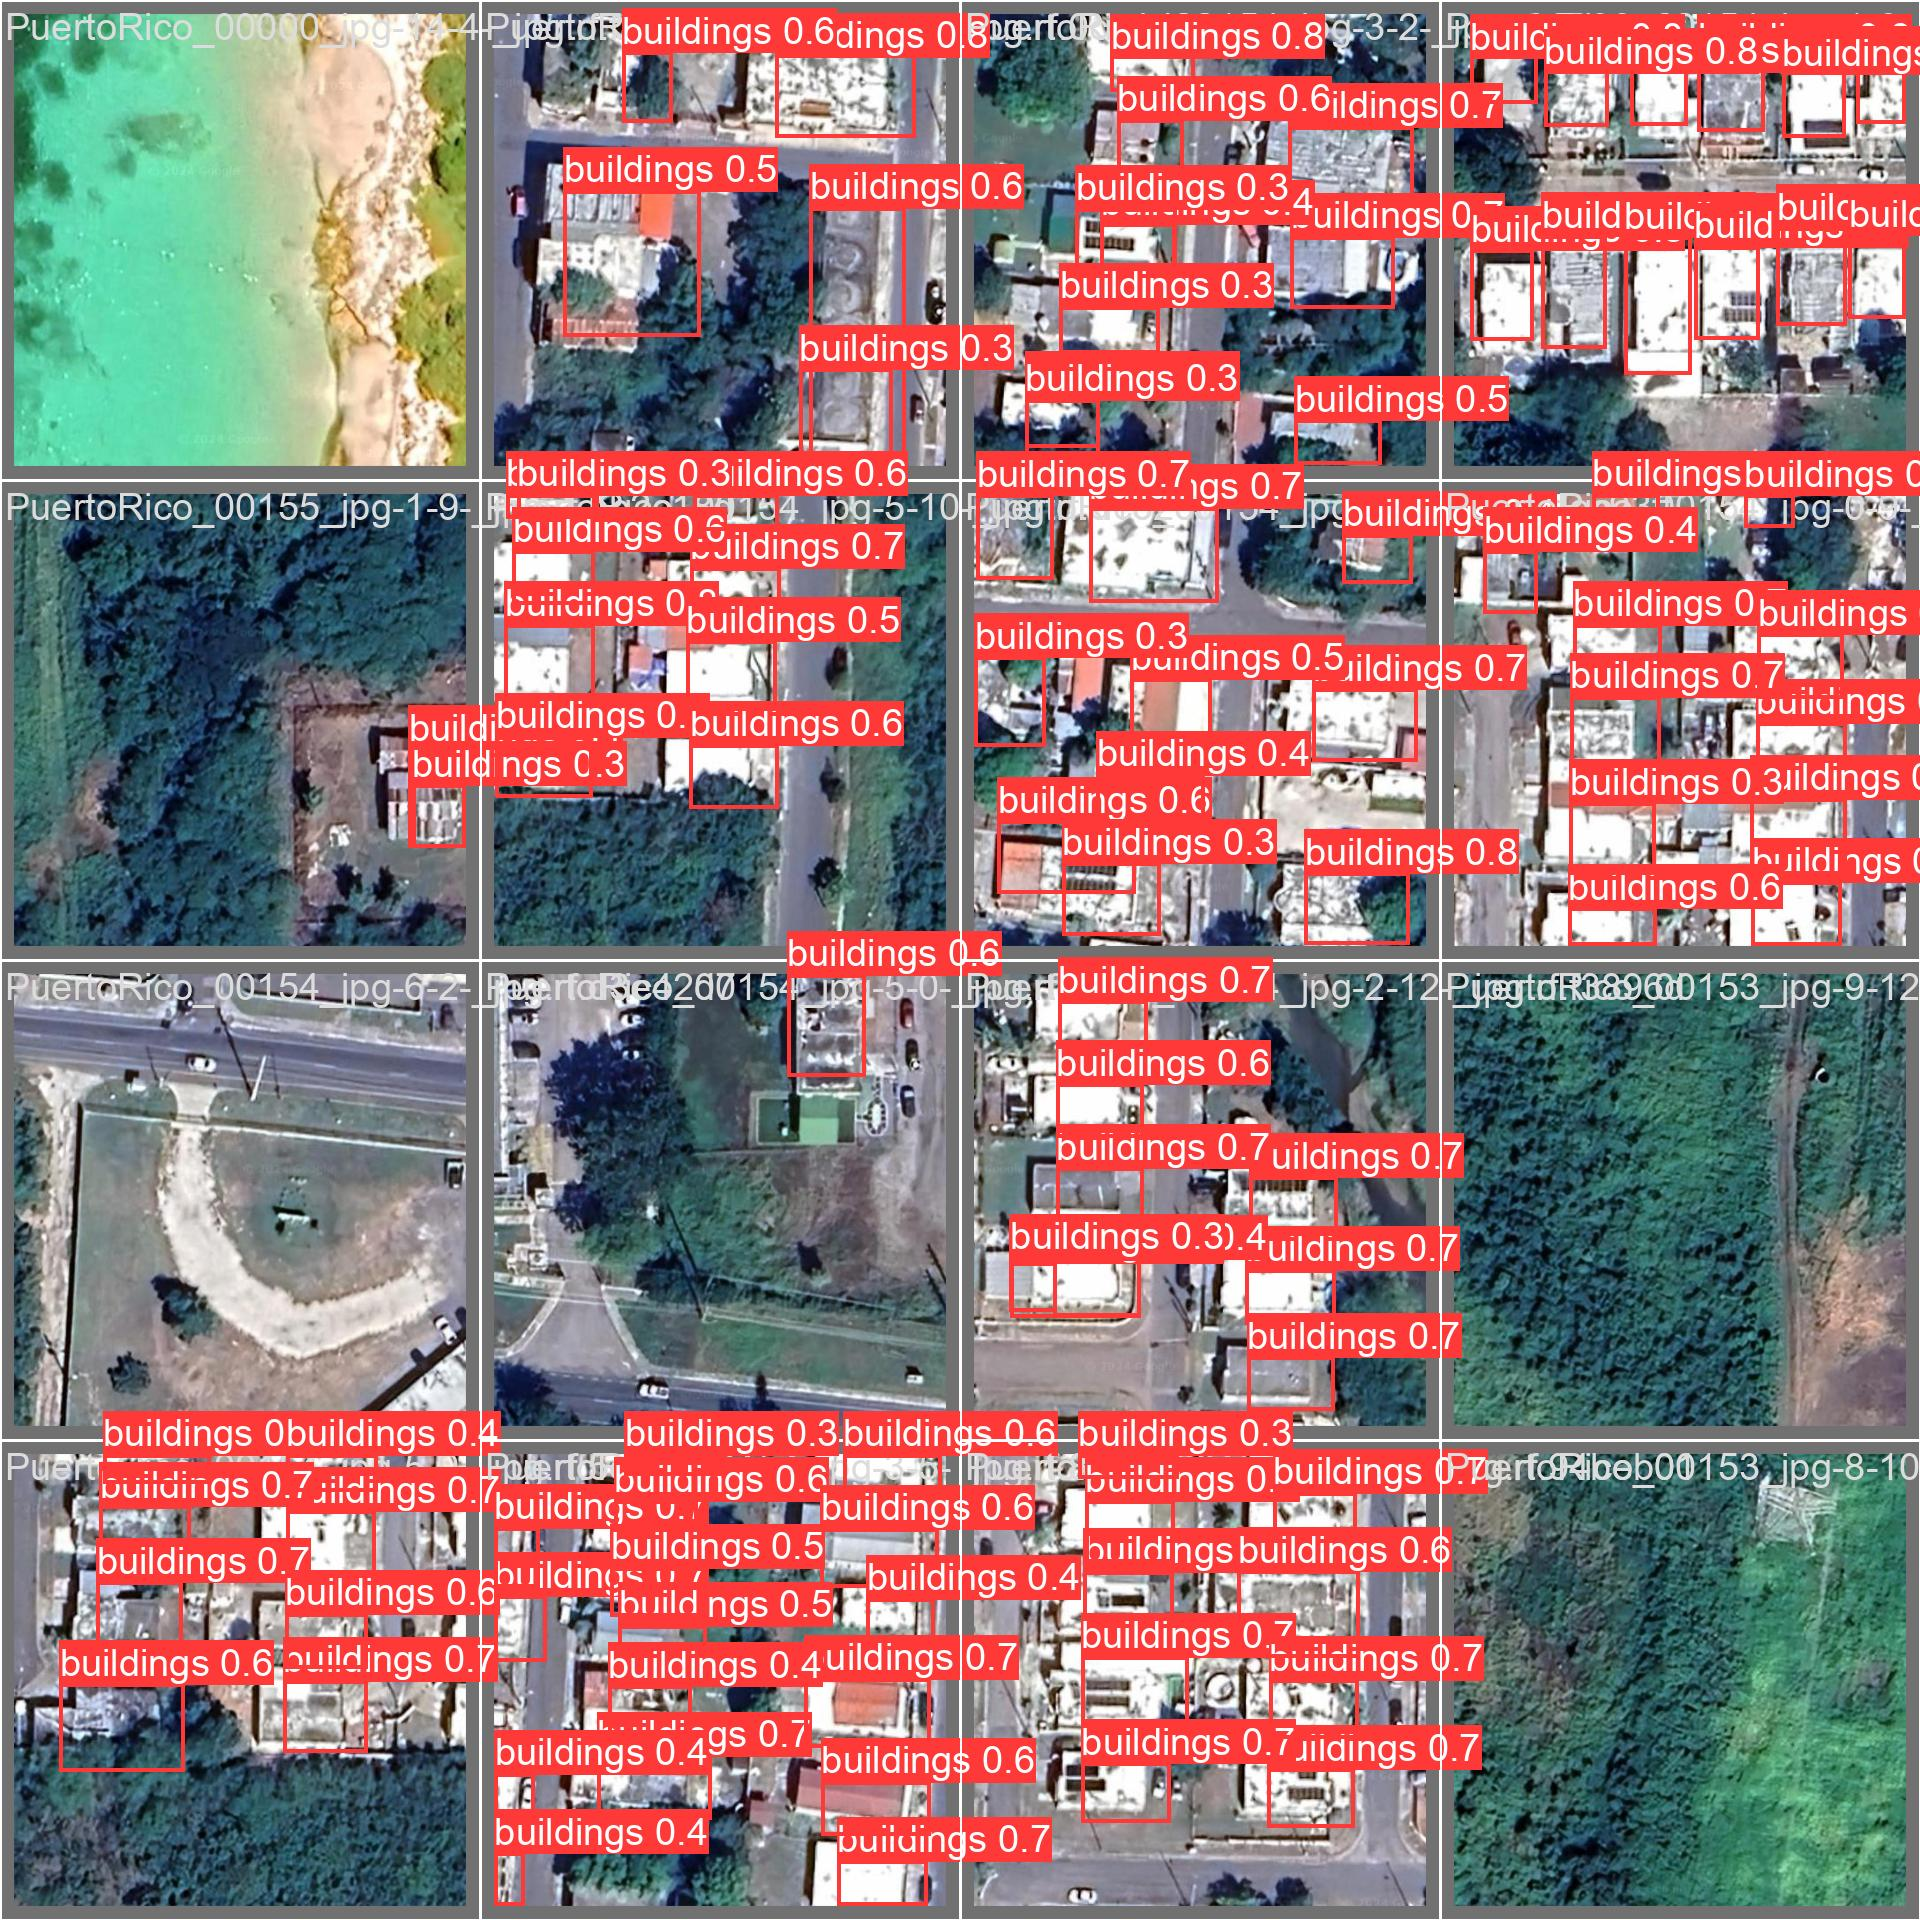

In [5]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [6]:
# Check the metrics provided
import pandas as pd

df = pd.read_csv(f'runs/detect/train/results.csv')
df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
75,76,1.2984,0.90229,1.2567,0.72876,0.61254,0.65388,0.34542,1.6769,1.1968,1.5314,0.000843,0.000843,0.000843
76,77,1.2855,0.89228,1.2503,0.73038,0.61185,0.65365,0.34537,1.6775,1.1965,1.5318,0.000719,0.000719,0.000719
77,78,1.2850,0.89068,1.2499,0.72983,0.61264,0.65370,0.34499,1.6785,1.1965,1.5327,0.000595,0.000595,0.000595
78,79,1.2770,0.88310,1.2445,0.72975,0.61324,0.65343,0.34472,1.6796,1.1965,1.5333,0.000471,0.000471,0.000471
79,80,1.2688,0.87376,1.2394,0.72875,0.61350,0.65314,0.34428,1.6808,1.1966,1.5343,0.000347,0.000347,0.000347


In [7]:
import matplotlib.pyplot as plt

epochs = df['                  epoch']
mAP50_B = df['       metrics/mAP50(B)']
mAP50_95_B = df['    metrics/mAP50-95(B)']

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(epochs, mAP50_B, label='mAP50(B)')
ax.plot(epochs, mAP50_95_B, label='    metrics/mAP50-95(B)')
ax.set_ylabel('mAP')
ax.set_xlabel('Epoch')
ax.legend()
fig.suptitle('mAP50(B) and mAP50-95(B) vs Epoch')
plt.show()

<Figure size 500x400 with 1 Axes>

## Validation and Inference

In [8]:
# Validation

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={yaml_file}

Ultralytics YOLOv8.0.196 🚀 Python-3.8.10 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7974MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/tham/Desktop/delete/EY/msft-buildings/valid/labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1623      10094      0.731      0.611      0.656      0.348
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# Inference

test_images = f"{dataset}/test/images"
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={test_images} save=True

## Rename "runs" directory to "pretrained"

In [12]:
# rename
import os
os.rename('runs', 'pretrained')